# MACHINE LEARNING: BÀI THỰC HÀNH PHẦN MÔ HÌNH PERCEPTRON.

# Ví dụ 1

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 30
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis=1)

y = np.concatenate((np.ones((1, N)), -1 * np.ones((1, N))), axis=1)
print(y)

# Xbar
X = np.concatenate((np.ones((1, 2 * N)), X), axis=0)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1.]]


Hiển thị dữ liệu.

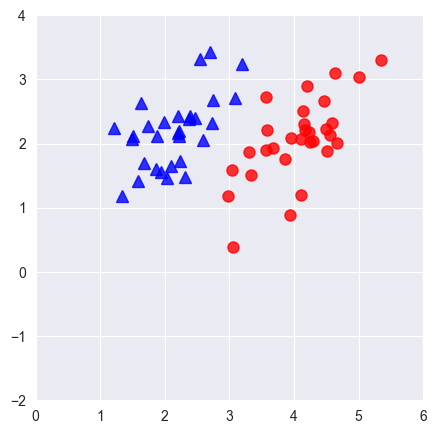

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
ani = plt.cla()

#plot points
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
ani = plt.axis([0, 6, -2, 4])

plt.show()

Xây dựng hàm y

In [47]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

Kiểm tra điều kiện dừng

In [48]:
#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)  #True if h(w, X) == y else False

Vòng lặp chính tìm đường phân chia (bộ hệ số W) theo phương pháp Gradient Descent

In [49]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    max_iter = 10000
    i = 0
    while i < max_iter:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(X.shape[0], 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        i = i + 1
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

Gọi hàm lặp và in ra kết quả là bộ trọng số W ở vòng lặp cuối

In [50]:
d = X.shape[0]
w_init = np.random.randn(d, 1)
print(w_init)
print(X.shape)
print(y.shape)
(w, m) = perceptron(X, y, w_init)

[[-1.02141473]
 [ 0.4323957 ]
 [-0.32358007]]
(3, 60)
(1, 60)


Tiếp theo chúng ta xây dựng phương thức vẽ đường phân chia để quan sát kết quả

In [51]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1 * x11 + w0) / w2, -(w1 * x12 + w0) / w2], 'k')
    else:
        x10 = -w0 / w1
        return plt.plot([x10, x10], [-100, 100], 'k')

Trong phần cuối, chúng ta sẽ hiển thị kết quả dạng ảnh động (gif)

MovieWriter imagemagick unavailable; using Pillow instead.


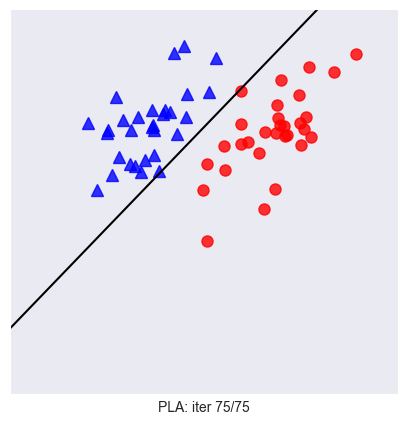

In [52]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


def viz_alg_1d_2(w):
    it = len(w)
    fig, ax = plt.subplots(figsize=(5, 5))

    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize=8, alpha=.8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize=8, alpha=.8)
        ani = plt.axis([0, 6, -2, 4])
        i2 = i if i < it else it - 1
        ani = draw_line(w[i2])
        if i < it - 1:
            # draw one misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill=False)
            ax.add_artist(circle)
        # hide axis
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        label = 'PLA: iter %d/%d' % (i2, it - 1)
        ax.set_xlabel(label)
        return ani, ax

    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save
    anim.save('C:\\Users\\thanhsen\\Documents\\Học máy\\pla_vis.gif', dpi=100, writer='imagemagick')
    plt.show()


viz_alg_1d_2(w)

# Ví dụ 2

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


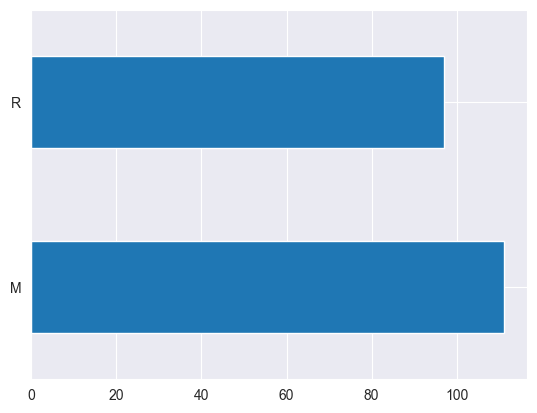

In [53]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

main_df = pd.read_csv('C:\\Users\\thanhsen\\Notebooks\\Học máy\\w6\\sonar.all-data.csv', header=None)
main_df
main_df[60].value_counts().plot(kind='barh')
y_df = main_df[60]
targes_label = {'M': 1, 'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)

inputs_df = main_df.drop(60, axis=1)

x0 = np.ones((inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.3, random_state=42)

## - Bài tập tự thực hành:

In [54]:
k = X_train.shape[1]
y_train = np.array(y_train).reshape(-1, 1)
w_init = np.random.randn(k, 1)
(w, m) = perceptron(np.array(X_train).T, y_train.T, w_init)
print(w[-1].T)

[[ -41.57617529  153.29640916  -51.38370734 -155.37393949  155.21711837
    40.38955933   32.69205254  -68.93413254  -26.24303674   52.59681463
   -55.38750625   87.35418852   13.38639845   -5.3077185   -10.33738017
     9.56341299  -27.97897205  -33.7686226    45.09815804  -19.21362938
    54.1485246   -78.07127584   77.22488286  -55.44684153   66.94691175
    -7.89195399  -12.8534796    -0.22521858   17.29993153  -28.436515
    73.36058562 -104.52637958   32.59929485   43.16769927  -51.41692605
    38.4681262   -68.68134943   16.90933109  -11.27928954   54.22818446
   -51.99948133   -9.74930996  -27.15218184   61.93964114   -2.58919403
    -7.61875688   57.53585001  -47.82234132  146.35601343  153.48844789
  -213.48626139   99.62636461   69.60536874   24.70873457  122.10926935
    -7.52601891  -66.89732329  -92.24981301   49.50542232  113.29265393
    64.20223815]]


In [55]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_pred = np.dot(w[-1].T, X_test.T)
y_pred = np.where(y_pred > 0, 1, -1)
print(y_pred)
print(y_test)

print('Accuracy: ', accuracy_score(y_test, y_pred.T))
print('Recall: ', recall_score(y_test, y_pred.T))
print('Precision: ', precision_score(y_test, y_pred.T))

[[ 1 -1  1 -1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1
  -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1
  -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1 -1]]
[1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1]
Accuracy:  0.7777777777777778
Recall:  0.8285714285714286
Precision:  0.7837837837837838


## - Sử dụng thư viện sklearn.linear_model.Perceptron

In [56]:
from sklearn.linear_model import Perceptron

X = np.concatenate((X0, X1), axis=1)

pct = Perceptron()
# penalty ~ regularization: 'None','l1','l2'
# fit_intercept = True => Xác định w_0 = b, = False => Bỏ qua
# Training
pct.fit(X.T, y.ravel())
# Testing
print(pct.coef_)


[[-13.45026995  15.242321  ]]


In [57]:
print(w[-1])

[[ -41.57617529]
 [ 153.29640916]
 [ -51.38370734]
 [-155.37393949]
 [ 155.21711837]
 [  40.38955933]
 [  32.69205254]
 [ -68.93413254]
 [ -26.24303674]
 [  52.59681463]
 [ -55.38750625]
 [  87.35418852]
 [  13.38639845]
 [  -5.3077185 ]
 [ -10.33738017]
 [   9.56341299]
 [ -27.97897205]
 [ -33.7686226 ]
 [  45.09815804]
 [ -19.21362938]
 [  54.1485246 ]
 [ -78.07127584]
 [  77.22488286]
 [ -55.44684153]
 [  66.94691175]
 [  -7.89195399]
 [ -12.8534796 ]
 [  -0.22521858]
 [  17.29993153]
 [ -28.436515  ]
 [  73.36058562]
 [-104.52637958]
 [  32.59929485]
 [  43.16769927]
 [ -51.41692605]
 [  38.4681262 ]
 [ -68.68134943]
 [  16.90933109]
 [ -11.27928954]
 [  54.22818446]
 [ -51.99948133]
 [  -9.74930996]
 [ -27.15218184]
 [  61.93964114]
 [  -2.58919403]
 [  -7.61875688]
 [  57.53585001]
 [ -47.82234132]
 [ 146.35601343]
 [ 153.48844789]
 [-213.48626139]
 [  99.62636461]
 [  69.60536874]
 [  24.70873457]
 [ 122.10926935]
 [  -7.52601891]
 [ -66.89732329]
 [ -92.24981301]
 [  49.5054223

In [58]:
y_pred = pct.predict(X.T)
print(y_pred)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1.]


# Ví dụ 3.

In [59]:
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()

# show to test record 5th
print(cancer_data.data[5])

print(cancer_data.data.shape)

#target set
print(cancer_data.target)

from sklearn.model_selection import train_test_split

cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3,
                                                    random_state=109)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [60]:
from sklearn.linear_model import Perceptron

pct = Perceptron()
pct.fit(X_train, y_train.ravel())
y_pred = pct.predict(X_test)

from sklearn.metrics import accuracy_score, recall_score, precision_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))


Accuracy:  0.9473684210526315
Recall:  0.9629629629629629
Precision:  0.9541284403669725


# Bài tập thực hành:

# Sử dụng lại dữ liệu trong ví dụ 2 và ví dụ 3, sau đó
## - Thực hiện giảm số chiều về 02 chiều bằng PCA
## - Vẽ biểu đồ PCA

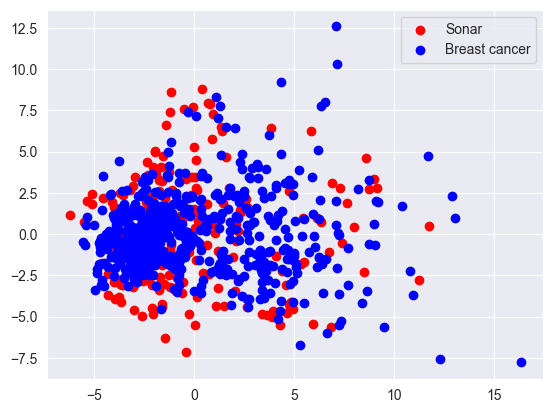

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

main_df = pd.read_csv('C:\\Users\\thanhsen\\Notebooks\\Học máy\\w6\\sonar.all-data.csv', header=None)
X = main_df.drop(60, axis=1)
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
X1 = cancer_data.data
X1 = StandardScaler().fit_transform(X1)
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X1)

# Hiển thị kết quả principalComponents và principalComponents1 lên màn hình, biểu diễn bằng 2 màu khác nhau

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c='r', label='Sonar')
plt.scatter(principalComponents1[:, 0], principalComponents1[:, 1], c='b', label='Breast cancer')
plt.legend()
plt.show()

## - Thực hiện phân loại bằng hồi quy Logistic và so sánh kết quả với phương pháp Perceptron đã thực hiện ở phần trước.

In [62]:
# Thực hiện phân loại bằng hồi quy Logistic và so sánh kết quả với phương pháp Perceptron đã thực hiện ở phần trước.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))

Accuracy:  0.9707602339181286
Recall:  0.9722222222222222
Precision:  0.9813084112149533


# Ví dụ 4 (Bài tập tự thực hành).

## - Hãy xử lý sơ bộ dữ liệu như trong yêu cầu của phần hồi quy logistic. Chia tập dữ liệu thành Traning:Validation = 7:3.

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

df = pd.read_csv("framingham.csv")

# Xóa các dòng có giá trị NaN
df=df.dropna(how="any", axis=0)

# Tạo tập train và tập test
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Chia tập dữ liệu thành tập train và tập test với tỉ lệ 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



## - Thực hiện phân loại bằng phương pháp Perceptron. Tính các độ đo Accuracy, Precision và Recall để đánh giá kết quả.

In [67]:
from sklearn.linear_model import Perceptron

pct = Perceptron()
pct.fit(X_train, y_train.ravel())
y_pred = pct.predict(X_test)

from sklearn.metrics import accuracy_score, recall_score, precision_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))


Accuracy:  0.8422971741112124
Recall:  0.1242603550295858
Precision:  0.45652173913043476


## - Thực hiện phân loại bằng phương pháp Hồi quy Logistic trên cùng bộ dữ liệu training:validation đã có ở ý trên. Tính các độ đo Accuracy, Precision và Recall và so sánh kết quả.

In [68]:
# Xây dựng mô hình Logistic Regression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print('Predictions: ', predictions)

print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))


Predictions:  [0 0 0 ... 0 0 0]
Accuracy:  0.8514129443938013
Precision:  0.6875
Recall:  0.0650887573964497
